In [1]:
import pandas as pd
import math 
import matplotlib.pyplot as plt
from scipy.stats import t
import numpy as np
from sklearn.linear_model import LinearRegression


In [17]:
def bar_graph(filename,title):
    df=pd.read_csv(filename,usecols=range(1,11))
    df=df.dropna()
    plt.rcParams["figure.figsize"] = [14.50, 7.50]
    plt.rcParams["figure.autolayout"] = True
    df.plot.bar(width=0.8)
    plt.title(title)
    plt.show()
    
def line_graph(filename, title):
    df=pd.read_csv(filename)
    df=df.dropna()
    plt.rcParams["figure.figsize"] = [9.50, 6.50]
    plt.rcParams["figure.autolayout"] = True
    df.set_index('YEAR').plot(marker=".")
    plt.xticks(df["YEAR"],df["YEAR"],rotation='vertical')
    plt.title(title)
    plt.show()

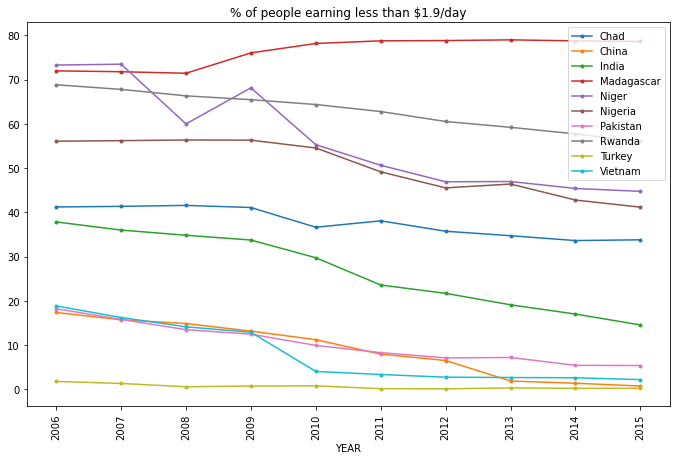

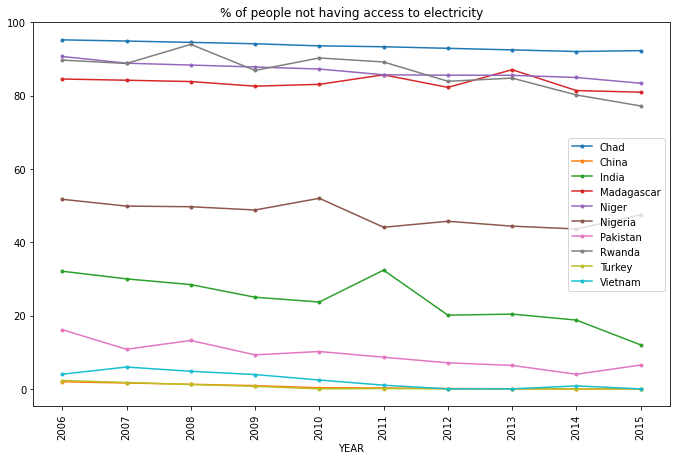

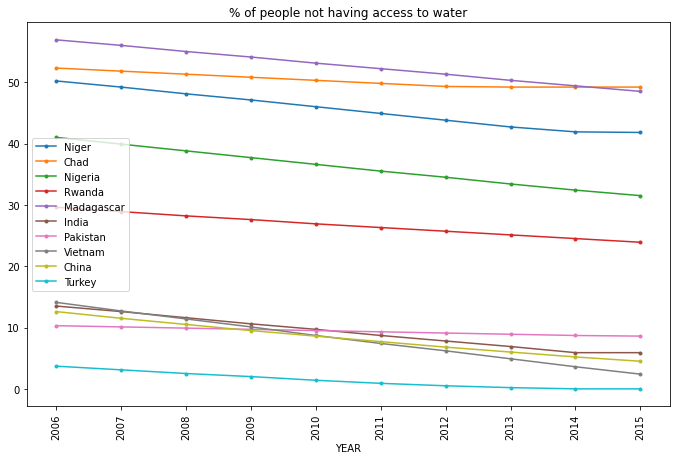

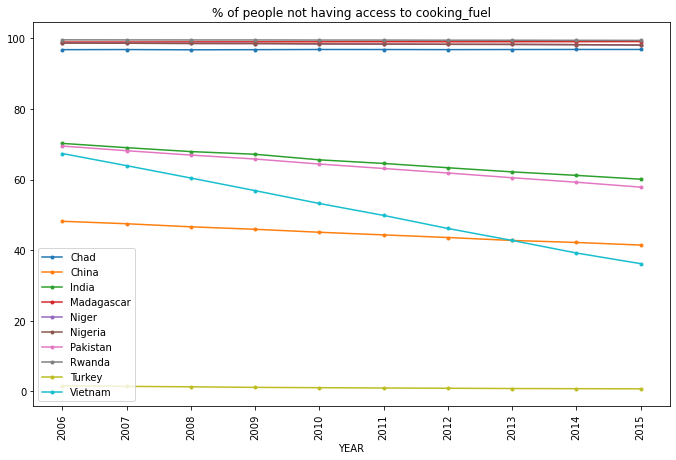

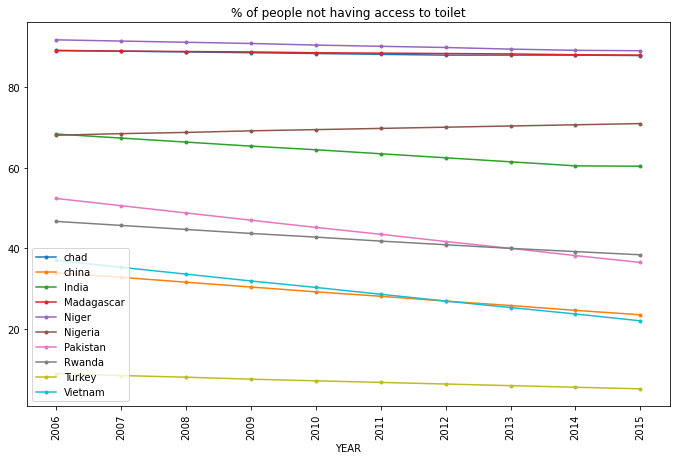

In [18]:
line_graph("./having_access/underonenine.csv", "% of people earning less than $1.9/day")
line_graph("./not_having_access/electricity.csv", "% of people not having access to electricity")
line_graph("./not_having_access/water.csv", "% of people not having access to water")
line_graph("./not_having_access/cooking_fuel.csv", "% of people not having access to cooking_fuel")
line_graph("./not_having_access/toilet.csv", "% of people not having access to toilet")

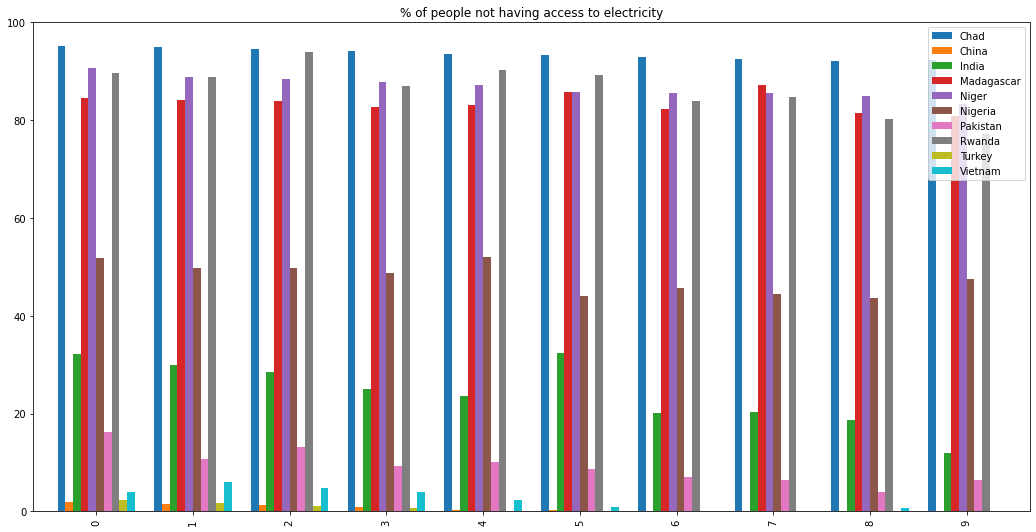

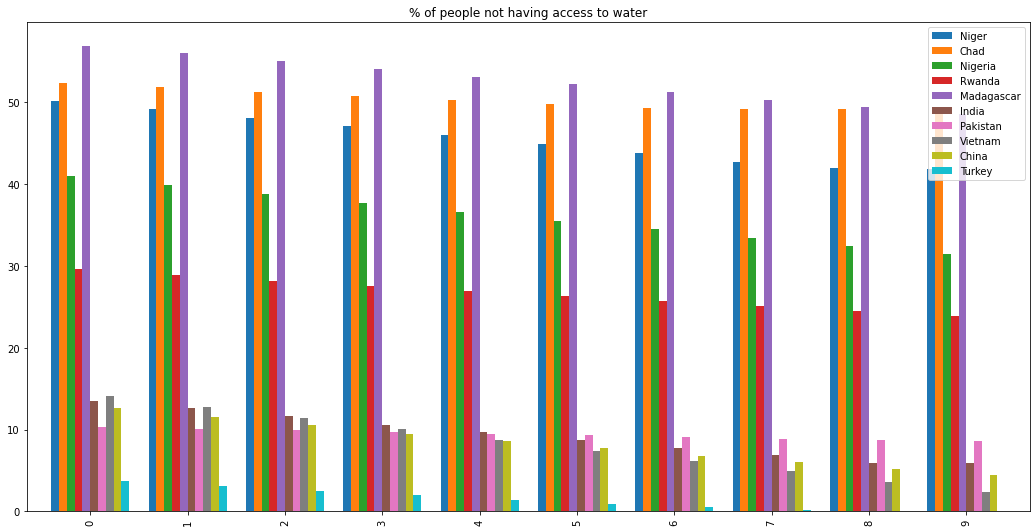

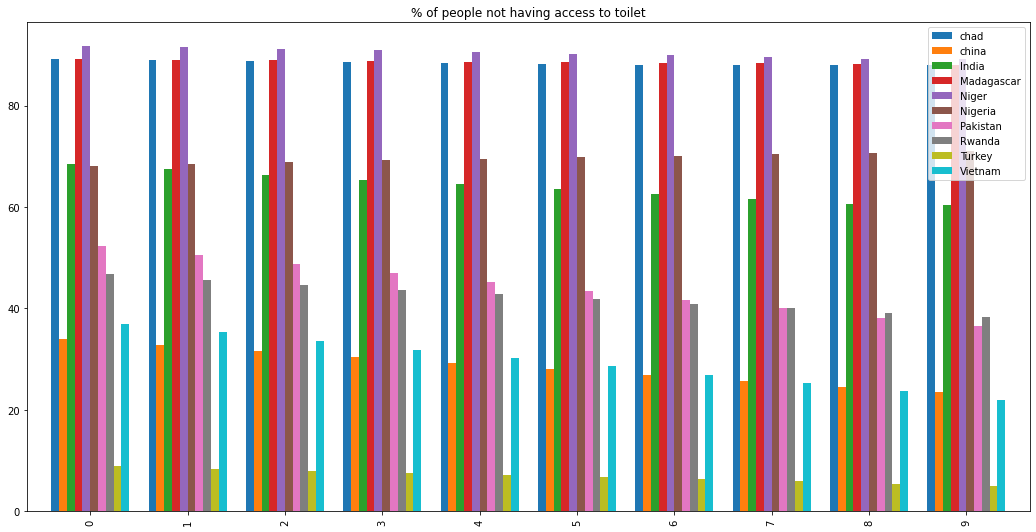

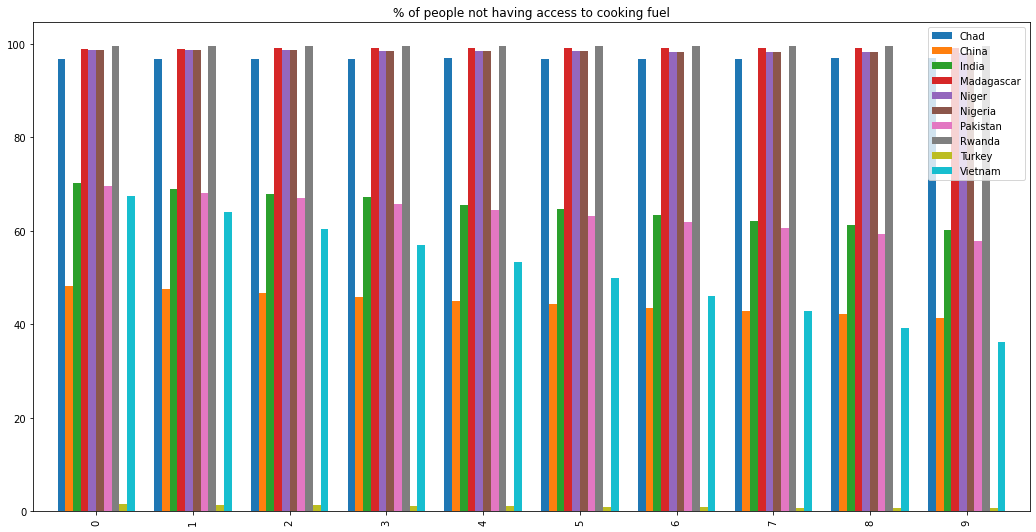

In [19]:
bar_graph("./not_having_access/electricity.csv", "% of people not having access to electricity")
bar_graph("./not_having_access/water.csv", "% of people not having access to water")
bar_graph("./not_having_access/toilet.csv", "% of people not having access to toilet")
bar_graph("./not_having_access/cooking_fuel.csv", "% of people not having access to cooking fuel")


In [ ]:
def corelation2(filename):
    df1=pd.read_csv(filename)
    df2=pd.read_csv("./having_access/underonenine.csv")
    
    df1_india=df1['India ']
    df2_india=df2['India']
    df1_india.dropna()
    df2_india.dropna()
#     sum of values
    sum_india_df1=df1_india.sum()
    sum_india_df2=df2_india.sum()
# mean of all values
    mean_india_df1=df1_india.mean()
    mean_india_df2=df2_india.mean()
#     multiply two rows
    df12_multiply=df1_india*df2_india
    df12_sum=df12_multiply.sum()
# square of variable data
    df1_square=df1_india.pow(2)
    df2_square=df2_india.pow(2)
#     return df1_square
#     sum of values
    df1_square_sum=df1_square.sum()
    df2_square_sum=df2_square.sum()
    


In [76]:
def corelation(filename):
    df1=pd.read_csv(filename)
    df2=pd.read_csv("./having_access/underonenine.csv")
    
    df1_india=df1['India']
    df2_india=df2['India']
    # print(df1_india)
    # print(df2_india)
    corr=df2_india.corr(df1_india)
    # print(round(corr,2))
    nrows=len(df1.index)
    t_value=(corr*math.sqrt(nrows-2))/(math.sqrt(1-(corr**2)))
    print(type(round(t_value,2)))  
    # print(type(t_value))
    return round(t_value,2)

In [77]:
t_value=corelation("./not_having_access/toilet.csv")
print(t_value)

<class 'numpy.float64'>
15.44


In [79]:
ta=1.86
print(type(ta))
if (t_value)>(ta):
    print("null hypothesis is rejectected and correlation is right tailed")
if (t_value)<(-ta):
    print("null hypothesis is rejectected and correlation is left tailed")
else:
    print(" null hypothsis is accepted")


<class 'float'>
null hypothesis is rejectected and correlation is right tailed
 null hypothsis is accepted


In [ ]:
toilet_corr=corelation("./not_having_access/toilet.csv")
electricity_corr=corelation("./not_having_access/electricity.csv")
water_corr=corelation("./not_having_access/water.csv")
cooking_fuel_corr=corelation("./not_having_access/cooking_fuel.csv")

In [ ]:
def power_method(filename):
    df_lpg=pd.read_csv(filename)
    df_lpg2=df_lpg.drop('country',1)
    df2_lpg_array=df_lpg2.to_numpy()
    
    def normalize(x):
        fac = abs(x).max()
        x_n = x / x.max()
        return fac, x_n
    
    x = np.array([1, 1,1, 1,1, 1,1, 1,1, 1])

    for i in range(8):
        x = np.dot(df2_lpg_array, x)
        lambda_1, x = normalize(x)
        
    print('Eigenvalue:', lambda_1)
    print('Eigenvector:', x)

    return lambda_1, x




In [ ]:
eigen_cooking_fuel=power_method("./power_method/cooking_fuel.csv")
eigen_toilet=power_method("./power_method/toilet.csv")
eigen_electricity=power_method("./power_method/electricity.csv")
eigen_water=power_method("./power_method/water.csv")

In [ ]:
def anova(filename):
    df = pd.read_csv(filename)
    df.drop('YEAR', axis=1)
    n = len(df.columns)
    k = df.size
    t_dic = {}
    for i in range(len(df)):
        s = 0
        for j in df.loc[i,:]:
            s += j
        t_dic[f't{i}'] = s
    T = sum(t_dic.values())
    t2 = sum([i ** 2 for i in t_dic.values()])
    SSTr = (t2/n) - (T ** 2/k)
    MSTr = SSTr/(k-1)
    SST = sum(df.pow(2).sum()) - (T ** 2/k)
    SSE = SST - SSTr
    MSE = SSE / (k * (n-1))
    f = MSE / MSTr
    fa=1.986
    if f>fa:
        return print("H0 is rejected")
    else:
        return print("H0 is accepted")   

In [ ]:
anova("./having_access/underonenine.csv")

In [ ]:
def regression(filename,title):
    data=pd.read_csv(filename)
    # data = pd.read_csv('data.csv')  # load data set
    X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()
    print(X)
    print(Y)
    print(Y_pred)
    # print("This is df\n", df)
    # df2=df['India'][1]
    # df1=df['India'].to_numpy()
    # df2=df['YEAR'].to_numpy()
    # # df1_array=df1.to_numpy()
    # print(df1)
    # print(df2)
 
    # plt.scatter(df1, df1, c ="blue")
    # # cbar = plt.colorbar()
    # # cbar.set_label('Rating (1-10)')
    # plt.tight_layout()
    # plt.title(title)
    # plt.xlabel('Year')
    # plt.ylabel("% of people not having access to electricity")
    # plt.show()


In [ ]:
regression("./not_having_access/electricity.csv", "electricity data")
# s=pd.read_csv("./not_having_access/electricity.csv")
# s['India']

In [49]:
def hyptothesis_on_two(file_underonenine,file2):
    df_underonenine=pd.read_csv(file_underonenine)
    df2=pd.read_csv(file2)
    
    df_underonenine_india=df_underonenine["India"]
    df2_india=df2[["YEAR","India"]]
    df2_india["India"]=df_underonenine_india
    print(df_underonenine_india)
    print(df2_india)

In [50]:
hyptothesis_on_two("./having_access/underonenine.csv", "./not_having_access/water.csv")

0    37.83
1    35.99
2    34.82
3    33.74
4    29.73
5    23.57
6    21.68
7    19.09
8    17.00
9    14.54
Name: India, dtype: float64
   YEAR  India
0  2006  37.83
1  2007  35.99
2  2008  34.82
3  2009  33.74
4  2010  29.73
5  2011  23.57
6  2012  21.68
7  2013  19.09
8  2014  17.00
9  2015  14.54


<ipython-input-49-101df157338f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_india["India"]=df_underonenine_india
